<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Tree_Based_Models_and_Their_Performance_for_Auto_Credit_Default_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparison of Tree-Based Models and Their Performance for Auto Credit Default Risk Analysis**


## **Summary**
Tree-based models are widely utilized in credit risk analysis. In this study, auto credit data was cleaned and preprocessed for use in various tree-based models. The models compared include the baseline Decision Tree, RandomizedSearchCV Decision Tree, Random Forest, and RandomizedSearchCV Random Forest. Details of the data cleaning and preprocessing methods are also provided.

Overall, the models achieved accuracy scores exceeding 90%. As expected, the Random Forest models performed better than the Decision Tree models. A detailed comparison reveals that both the basic Random Forest and RandomizedSearchCV Random Forest models attained the highest accuracy, both at 0.93. The RandomizedSearchCV Decision Tree achieved an accuracy of 0.92, while the baseline Decision Tree performed with an accuracy of 0.90. The RandomizedSearchCV Random Forest and basic Random Forest both achieved an accuracy of 0.93, indicating they are equally effective for this task.

With further hyperparameter tuning and cross-validation, the performance of the RandomizedSearchCV Random Forest could potentially improve. Table 1 shows the comparison of results. Additionally, Figures 1 to 4 at the bottom reveal the confusion matrices for the four methods.



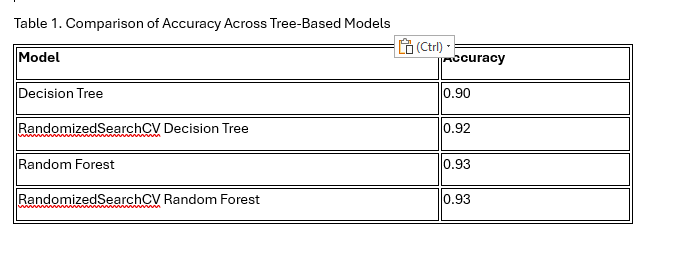




Missing values after imputation: 0
Decision Tree Accuracy: 0.8953307073691121

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     22425
         1.0       0.36      0.41      0.38      1947

    accuracy                           0.90     24372
   macro avg       0.66      0.67      0.66     24372
weighted avg       0.90      0.90      0.90     24372



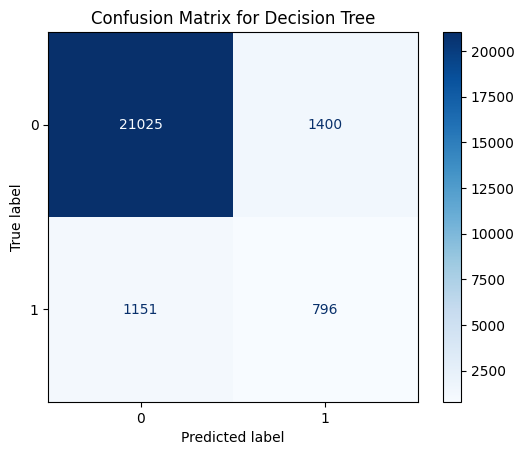

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, 

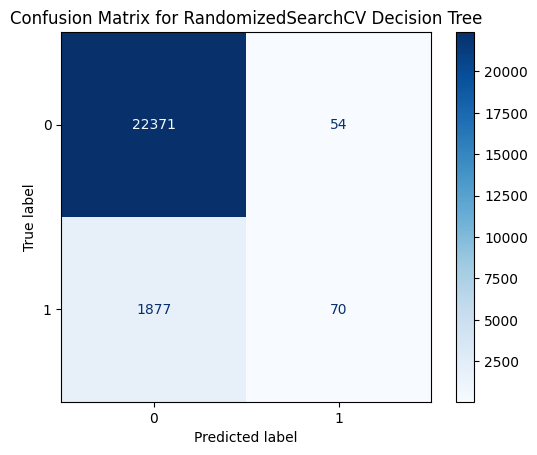

Random Forest Accuracy: 0.9325455440669621

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     22425
         1.0       0.95      0.16      0.28      1947

    accuracy                           0.93     24372
   macro avg       0.94      0.58      0.62     24372
weighted avg       0.93      0.93      0.91     24372



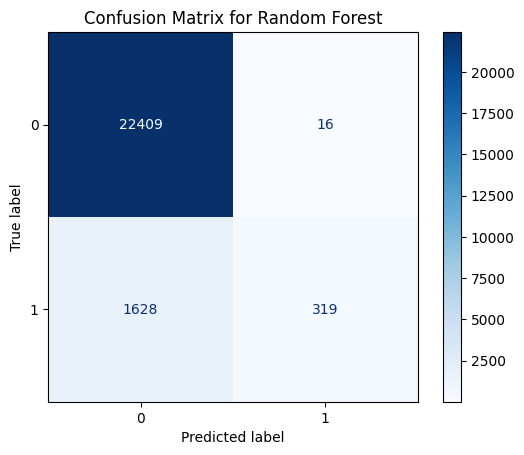

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   5.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   5.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   5.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   5.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   5.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.8s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.8s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.8s
[CV] 

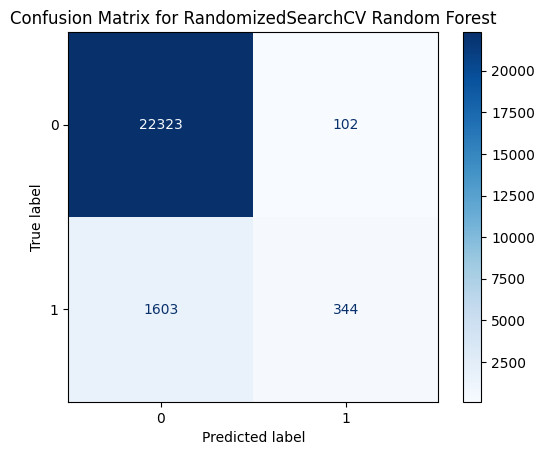


Model Outcomes:
                                  Accuracy Precision Recall F1 Score
Decision Tree                     0.895331       N/A    N/A      N/A
RandomizedSearchCV Decision Tree   0.92077       N/A    N/A      N/A
Random Forest                     0.932546       N/A    N/A      N/A
RandomizedSearchCV Random Forest  0.930043       N/A    N/A      N/A


In [ ]:
# Data manipulation and analysis
import numpy as np                       # Numerical operations
import pandas as pd                      # Data manipulation

# Visualization
import matplotlib.pyplot as plt          # Plotting and visualization

# Data preprocessing and imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  # For missing data imputation
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding and scaling

# Model training and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Data splitting and hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,                      # Accuracy metric
    classification_report,               # Classification report
    confusion_matrix,                    # Confusion matrix
    ConfusionMatrixDisplay               # Display for confusion matrix
)

# Optimize memory usage
def optimize_memory_usage(df):
    for col in df.select_dtypes(include=['float']):
        df[col] = pd.to_numeric(df[col], downcast='float', errors='coerce')
    for col in df.select_dtypes(include=['int']):
        df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')
    for col in df.select_dtypes(include=['object']):
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Clean data sets
def clean_data(df):
    df = df.replace('x', '', regex=True)
    return df

# Encode categorical columns
def encode_categorical_columns(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = le.fit_transform(df[col])
        except:
            df[col] = df[col].astype('category').cat.codes
    return df

# Drop columns with all NaN values and handle missing data with iterative imputation
def drop_and_impute(df):
    df = df.dropna(axis=1, how='all')
    imputer = IterativeImputer()
    imputed_array = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
    print(f"Missing values after imputation: {imputed_df.isna().sum().sum()}")
    return imputed_df

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Decision Tree and Random Forest comparison
def model_comparison(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    try:
        # Basic Decision Tree
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_test)
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
        results['Decision Tree'] = {
            'Accuracy': accuracy_dt,
            'Precision': report_dt['1']['precision'] if '1' in report_dt else 'N/A',
            'Recall': report_dt['1']['recall'] if '1' in report_dt else 'N/A',
            'F1 Score': report_dt['1']['f1-score'] if '1' in report_dt else 'N/A'
        }
        print("Decision Tree Accuracy:", accuracy_dt)
        print("\nClassification Report for Decision Tree:")
        print(classification_report(y_test, y_pred_dt))

        plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')

        # Randomized Search CV for Decision Tree
        param_dist_dt = {
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
        rand_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=10, cv=5, random_state=42, n_jobs=1, verbose=2)
        rand_search_dt.fit(X_train, y_train)
        y_pred_rand_dt = rand_search_dt.predict(X_test)
        accuracy_rand_dt = accuracy_score(y_test, y_pred_rand_dt)
        report_rand_dt = classification_report(y_test, y_pred_rand_dt, output_dict=True)
        results['RandomizedSearchCV Decision Tree'] = {
            'Accuracy': accuracy_rand_dt,
            'Precision': report_rand_dt['1']['precision'] if '1' in report_rand_dt else 'N/A',
            'Recall': report_rand_dt['1']['recall'] if '1' in report_rand_dt else 'N/A',
            'F1 Score': report_rand_dt['1']['f1-score'] if '1' in report_rand_dt else 'N/A'
        }
        print("Randomized Search CV Decision Tree Accuracy:", accuracy_rand_dt)
        print("\nClassification Report for Randomized Search CV Decision Tree:")
        print(classification_report(y_test, y_pred_rand_dt))

        plot_confusion_matrix(y_test, y_pred_rand_dt, 'RandomizedSearchCV Decision Tree')

        # Basic Random Forest
        rf = RandomForestClassifier(random_state=42, n_jobs=1)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
        results['Random Forest'] = {
            'Accuracy': accuracy_rf,
            'Precision': report_rf['1']['precision'] if '1' in report_rf else 'N/A',
            'Recall': report_rf['1']['recall'] if '1' in report_rf else 'N/A',
            'F1 Score': report_rf['1']['f1-score'] if '1' in report_rf else 'N/A'
        }
        print("Random Forest Accuracy:", accuracy_rf)
        print("\nClassification Report for Random Forest:")
        print(classification_report(y_test, y_pred_rf))

        plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

        # Randomized Search CV for Random Forest
        param_dist_rf = {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
        rand_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=5, random_state=42, n_jobs=1, verbose=2)
        rand_search_rf.fit(X_train, y_train)
        y_pred_rand_rf = rand_search_rf.predict(X_test)
        accuracy_rand_rf = accuracy_score(y_test, y_pred_rand_rf)
        report_rand_rf = classification_report(y_test, y_pred_rand_rf, output_dict=True)
        results['RandomizedSearchCV Random Forest'] = {
            'Accuracy': accuracy_rand_rf,
            'Precision': report_rand_rf['1']['precision'] if '1' in report_rand_rf else 'N/A',
            'Recall': report_rand_rf['1']['recall'] if '1' in report_rand_rf else 'N/A',
            'F1 Score': report_rand_rf['1']['f1-score'] if '1' in report_rand_rf else 'N/A'
        }
        print("Randomized Search CV Random Forest Accuracy:", accuracy_rand_rf)
        print("\nClassification Report for Randomized Search CV Random Forest:")
        print(classification_report(y_test, y_pred_rand_rf))

        plot_confusion_matrix(y_test, y_pred_rand_rf, 'RandomizedSearchCV Random Forest')

    except Exception as e:
        print(f"An error occurred during model comparison: {e}")

    return results

# Main execution block
if __name__ == "__main__":
    df = pd.read_csv('/content/AutoCredit.csv', low_memory=False)
    df = clean_data(df)
    df = optimize_memory_usage(df)
    df = encode_categorical_columns(df)

    # Apply drop_and_impute to handle missing values
    df = drop_and_impute(df)

    y = df['Default']  # Target variable
    X = pd.get_dummies(df.drop(columns=['Default']), drop_first=True)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Get model comparison results
    results = model_comparison(X_scaled, y)

    # Convert results to DataFrame for easier comparison
    results_df = pd.DataFrame(results).T

    # Display the results table
    print("\nModel Outcomes:")
    print(results_df)
